# MNIST Hand Writing Digit

# Listing 2.1 Loading The MNIST Dataset In Keras

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_images[0].ndim

2

In [5]:
train_images[0].shape

(28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels[0]

7

In [8]:
train_labels[0]

5

# Listing 2.2 The Network Architecture

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

# Dense means fully connected each node
# Activation function select usefull data and skip jurnk data
# Activation Function convert linearity to non_linearity
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))

# Softmax function show high probablity out of 10
network.add(layers.Dense(10, activation = 'softmax'))

# Listing 2.3 The Compilation Step

In [10]:
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Listing 2.4 Preparing The Image Data

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Listing 2.5 Preparing The Labels

In [12]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2584 - accuracy: 0.9257
Epoch 2/5
60000/60000 [==============================] - ETA: 0s - loss: 0.1035 - accuracy: 0.96 - 6s 102us/sample - loss: 0.1035 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0683 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0490 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0363 - accuracy: 0.9889


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.0662 - accuracy: 0.9797
test_acc: 0.9797


In [15]:
network.predict(test_images)[0]

array([6.6518901e-10, 1.7456321e-11, 7.5569238e-07, 1.6585840e-06,
       1.7359437e-11, 7.9522291e-09, 5.7271684e-15, 9.9999726e-01,
       9.3465843e-08, 1.8687616e-07], dtype=float32)

# Listing 2.6 Display The Fourth Digit

TypeError: Invalid shape (784,) for image data

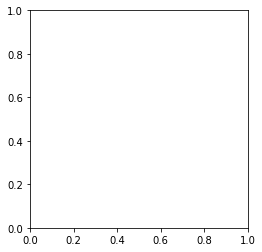

In [21]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()